In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
#Create engine to hawaii.sqlite
path = '/Users/brittanieocampo/Desktop/SQL-Alchemy-Challenge/Resources/hawaii.sqlite'
engine = create_engine(f"sqlite:///{path}")
connect = engine.connect()

In [5]:
#Reflect an existing database into a new model
Base = automap_base()

In [6]:
#Reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
#View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
#Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
#Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
#Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

One year from last date in data set:  2016-08-23


Text(0, 0.5, 'Precipitation')

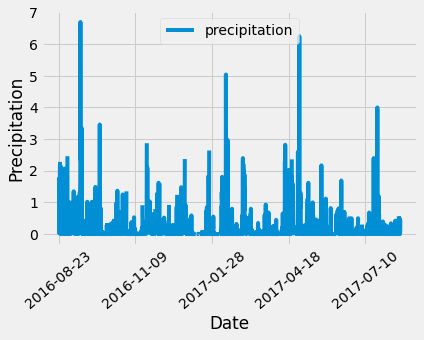

In [40]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results.

#Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One year from last date in data set: ", one_year)

#Perform a query to retrieve the data (date?) and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year).all()

#Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)

#Sort the dataframe by date
df = df.sort_index()
df 

#Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=40)
plt.xlabel('Date')
plt.ylabel('Precipitation')



In [54]:
#Use Pandas to calculate the summary statistics for the precipitation data
summary = df.describe()
summary

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [55]:
#Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()


9

In [56]:
#Design a query to find the most active stations (i.e. what stations have the most rows?)
#List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
#Using the most active station ID ('USC00519281', 2772) from the previous query, calculate the lowest(min), highest(max), and average(avg) temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

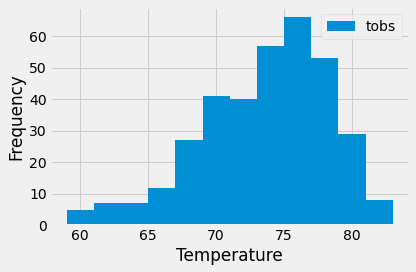

In [27]:
#Using the most active station ID ('USC00519281', 2772)
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >= '2016-08-23').order_by(Measurement.date).all()

#Plot as a Histogram
df = pd.DataFrame(query, columns=['tobs'])
df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.tight_layout()

# Close session

In [28]:
#Close Session
session.close()